In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import numpy as np


In [2]:
df = pd.read_csv("c:/Users/REVAN/Documents/ML/electric vehicle in US/Electric_Vehicle_Population_Size_History_By_County_.csv")

In [3]:
df.head()

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,September 30 2022,Riverside,CA,Passenger,7,0,7,460,467,1.50
1,December 31 2022,Prince William,VA,Passenger,1,2,3,188,191,1.57
2,January 31 2020,Dakota,MN,Passenger,0,1,1,32,33,3.03
3,June 30 2022,Ferry,WA,Truck,0,0,0,"3,575","3,575",0.00
4,July 31 2021,Douglas,CO,Passenger,0,1,1,83,84,1.19


In [4]:
df.isnull().sum()

Date                                         0
County                                      86
State                                       86
Vehicle Primary Use                          0
Battery Electric Vehicles (BEVs)             0
Plug-In Hybrid Electric Vehicles (PHEVs)     0
Electric Vehicle (EV) Total                  0
Non-Electric Vehicle Total                   0
Total Vehicles                               0
Percent Electric Vehicles                    0
dtype: int64

In [5]:
DS = df.drop(columns=['County', 'State', 'Vehicle Primary Use'])
DS.head()

,Date,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,September 30 2022,7,0,7,460,467,1.50
1,December 31 2022,1,2,3,188,191,1.57
2,January 31 2020,0,1,1,32,33,3.03
3,June 30 2022,0,0,0,"3,575","3,575",0.00
4,July 31 2021,0,1,1,83,84,1.19


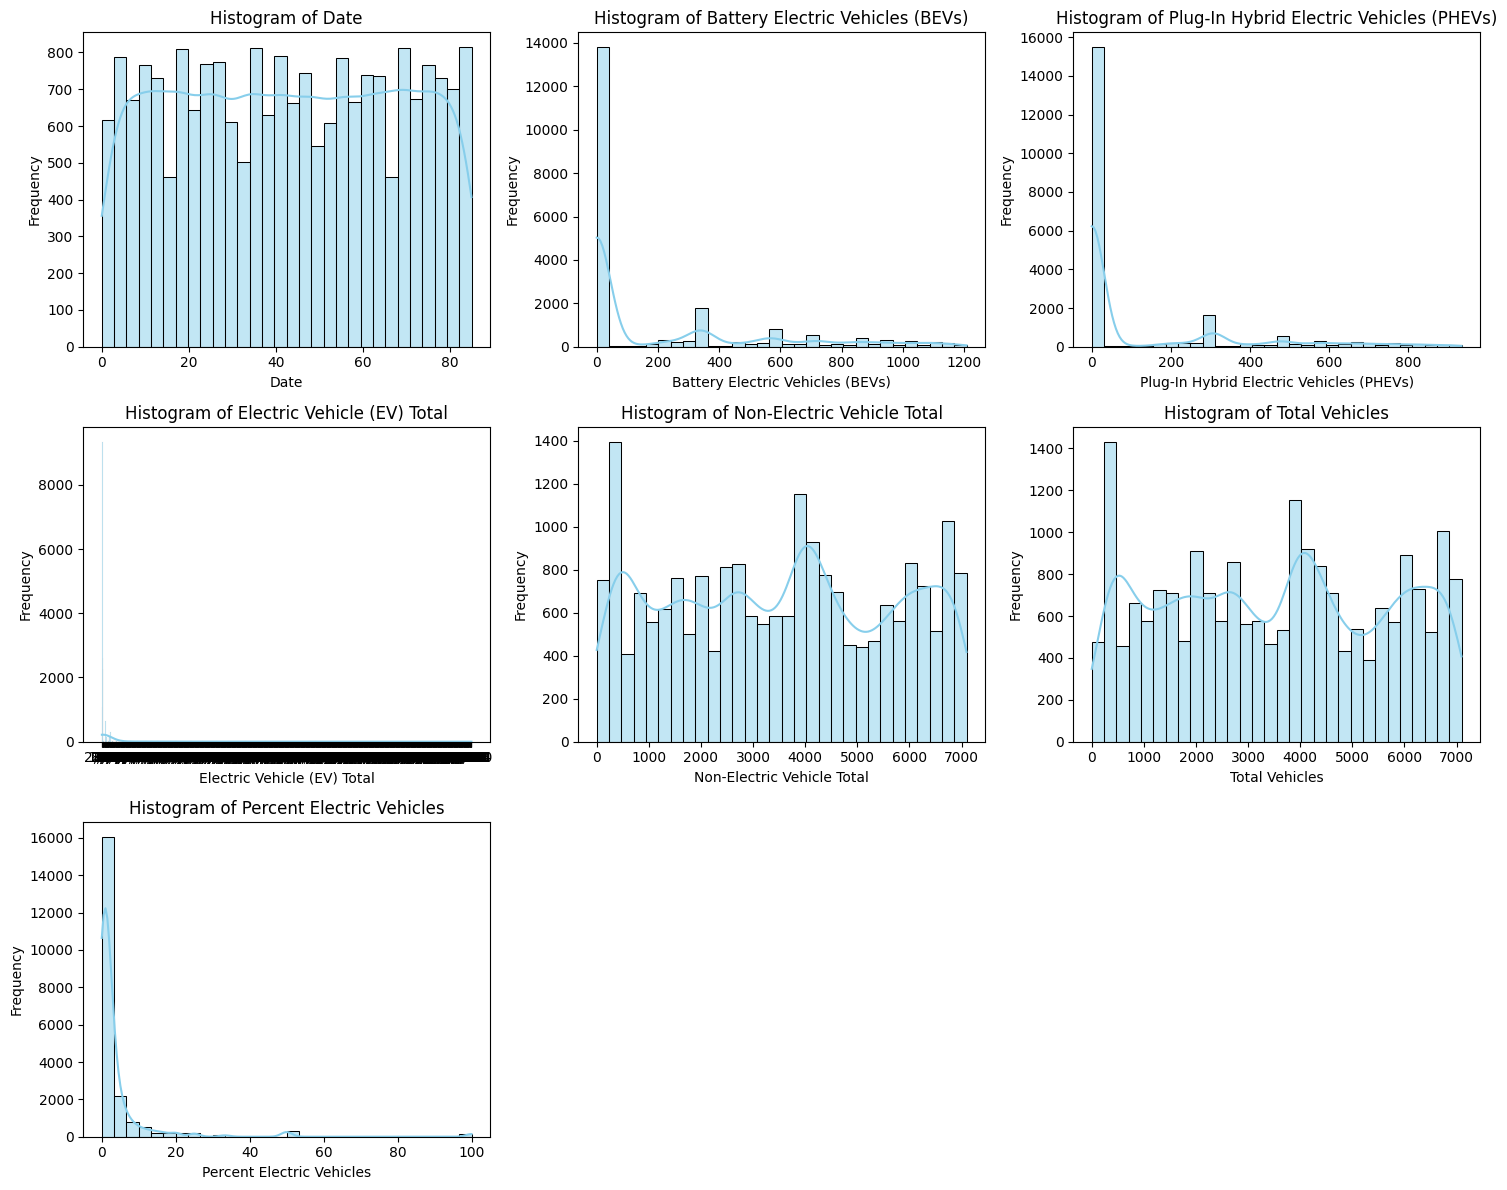

In [ ]:
numeric_cols = DS.select_dtypes(include=['float64', 'int64', 'object']).columns

n_cols = 3
n_rows = (len(numeric_cols) - 1) // n_cols + 1

plt.figure(figsize=(n_cols * 5, n_rows * 4)) 

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(DS[col].dropna(), kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
Label_encoder = LabelEncoder()

DS['Date'] = Label_encoder.fit_transform(DS['Date'])
DS['Battery Electric Vehicles (BEVs)'] = Label_encoder.fit_transform(DS['Battery Electric Vehicles (BEVs)'])
DS['Plug-In Hybrid Electric Vehicles (PHEVs)'] = Label_encoder.fit_transform(DS['Plug-In Hybrid Electric Vehicles (PHEVs)'])
#DS['Electric Vehicle (EV) Total'] = Label_encoder.fit_transform(DS['Electric Vehicle (EV) Total'])
DS['Non-Electric Vehicle Total'] = Label_encoder.fit_transform(DS['Non-Electric Vehicle Total'])
DS['Total Vehicles'] = Label_encoder.fit_transform(DS['Total Vehicles'])
#DS['Percent Electric Vehicles'] = Label_encoder.fit_transform(DS['Percent Electric Vehicles'])

In [66]:
x = DS.drop(columns = ['Electric Vehicle (EV) Total', 'Percent Electric Vehicles'])
y = DS[['Electric Vehicle (EV) Total', 'Percent Electric Vehicles']]

In [65]:
x_training, x_testing, y_training, y_testing = train_test_split(x, y, test_size= 0.3, random_state = 82)

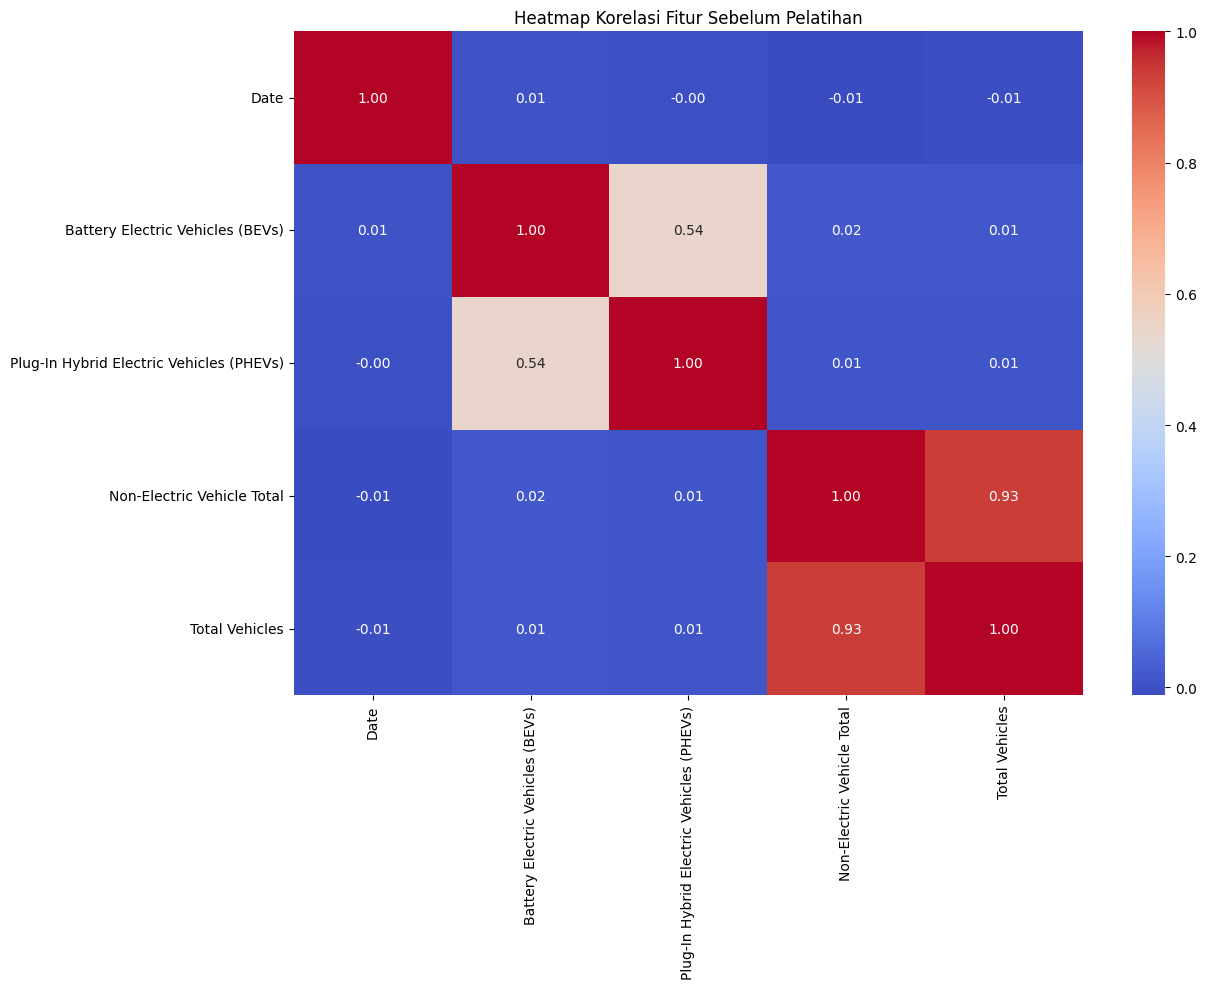

In [68]:
plt.figure(figsize=(13, 10))
sns.heatmap(x_training.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi Fitur Sebelum Pelatihan")
plt.tight_layout()
plt.show()

In [ ]:
y_training = y_training.apply(pd.to_numeric, errors='coerce')
y_testing = y_testing.apply(pd.to_numeric, errors='coerce')

valid_idx = y_training.dropna().index
x_training = x_training.loc[valid_idx]
y_training = y_training.loc[valid_idx]

valid_idx = y_testing.dropna().index
x_testing = x_testing.loc[valid_idx]
y_testing = y_testing.loc[valid_idx]

In [37]:
skala = StandardScaler()
#x_training = skala.fit_transform(x_training)
#x_testing = skala.transform(x_testing)
data_transform = skala.fit_transform(x_training.to_numpy())  
data_transform = pd.DataFrame(data_transform, columns = x.columns)
data_transform

,Date,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Non-Electric Vehicle Total,Total Vehicles
0,1.372475,-0.591897,-0.495631,1.358683,1.473058
1,0.085550,-0.595109,-0.495631,-0.556405,-0.583392
2,-0.155748,-0.591897,-0.495631,0.236713,0.315173
3,0.286632,-0.591897,-0.495631,0.349476,0.374283
4,-1.241591,2.726690,1.764092,1.127967,1.145094
...,...,...,...,...,...
14086,-1.563322,-0.591897,-0.495631,0.433930,0.440543
14087,1.251826,-0.595109,0.968215,0.670780,0.665542
14088,0.206199,-0.591897,-0.495631,-0.438452,-0.411306
14089,-0.758994,-0.595109,-0.490893,-1.663749,-0.723539


In [38]:
KNN = KNeighborsRegressor(n_neighbors=5)
KNN.fit(x_training, y_training)

KNeighborsRegressor()

In [41]:
y_pred = KNN.predict(x_testing)
mse = mean_squared_error(y_testing, y_pred)
r2 = r2_score(y_testing, y_pred)
mae = mean_absolute_error(y_testing, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Square Error: {mse:.2f}, R²: {r2:.2f}, Mean Absolute Error: {mae:2f}, Root Mean Square Error: {rmse:2f}")

Mean Square Error: 893.73, R²: 0.92, Mean Absolute Error: 3.899230, Root Mean Square Error: 29.895382


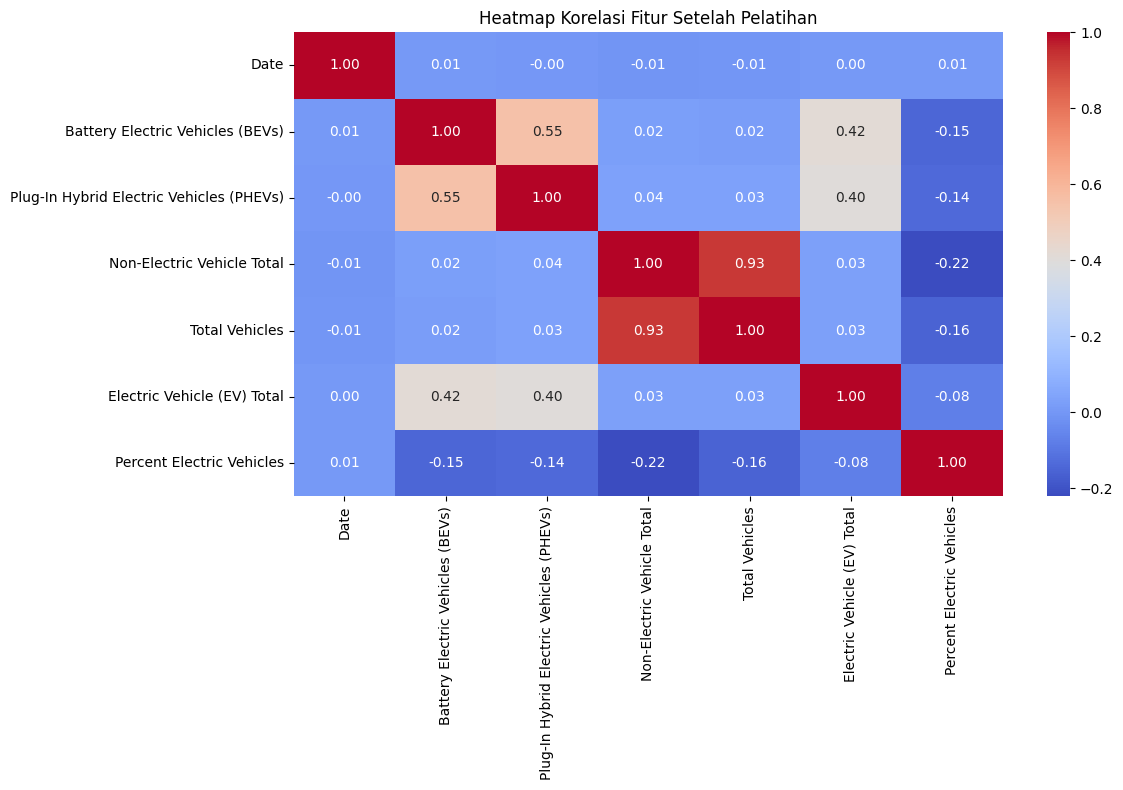

In [63]:
training_corr = pd.concat([x_training, y_training], axis=1)

plt.figure(figsize=(12, 8))
sns.heatmap(training_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi Fitur Setelah Pelatihan")
plt.tight_layout()
plt.show()

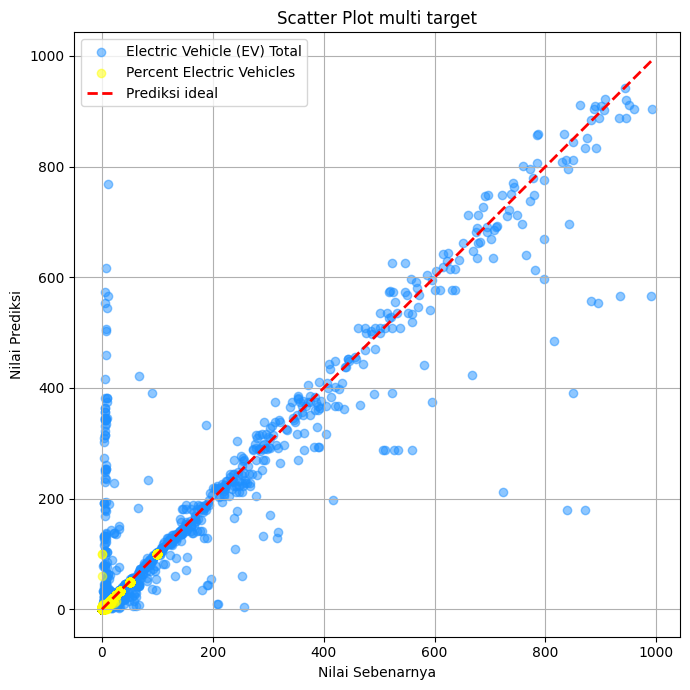

In [61]:
if not isinstance(y_testing, pd.DataFrame):
    y_testing = pd.DataFrame(y_testing, columns=['Electric Vehicle (EV) Total', 'Percent Electric Vehicles'])
if not isinstance(y_pred, pd.DataFrame):
    y_pred = pd.DataFrame(y_pred, columns=['Electric Vehicle (EV) Total', 'Percent Electric Vehicles'])

plt.figure(figsize=(7, 7))

colors = ['dodgerblue', 'yellow']
for i, col in enumerate(y_testing.columns):
    plt.scatter(
        y_testing[col],
        y_pred[col],
        alpha=0.5,
        label=f"{col}",
        color=colors[i]
    )

min_val = min(y_testing.min().min(), y_pred.min().min())
max_val = max(y_testing.max().max(), y_pred.max().max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Prediksi ideal')

plt.xlabel("Nilai Sebenarnya")
plt.ylabel("Nilai Prediksi")
plt.title("Scatter Plot multi target")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
#with open('c:/Users/REVAN/Documents/ML/Model_KNN.pkl', 'wb') as f:
    #pickle.dump(KNN, f)